In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [106]:
df=pd.read_csv("hope.csv")

In [107]:
df['Date'] = pd.to_datetime(df['Date'])

In [108]:
df.head() 

,Unnamed: 0,customer,age,gender,merchant,amount,fraud,City,type,Card Type,Exp Type,oldbalanceOrg,oldbalanceDest,Date,newbalanceOrg,newbalanceDest
0,0,C546697817,5,F,M348934600,25.31,0,Delhi,CASH_OUT,Signature,Food,47169.0,205879.66,2011-11-05,47143.69,205904.97
1,1,C465897830,4,M,M480139044,263.24,1,Delhi,PAYMENT,Signature,Travel,20143.0,2469789.14,2011-10-21,19879.76,2470052.38
2,2,C2125787399,4,F,M349281107,59.77,0,Jaipur,CASH_OUT,Signature,Travel,33819.0,414358.05,2013-02-25,33759.23,414417.82
3,3,C2118328869,2,F,M933210764,278.73,1,Lucknow,CASH_OUT,Signature,Food,14309.0,101846.02,2014-03-12,14030.27,102124.75
4,4,C1837200499,4,M,M980657600,958.53,1,Pandharpur,CASH_OUT,Signature,Food,54794.0,35507.81,2012-12-16,53835.47,36466.34


In [109]:
df.drop(columns=[df.columns[0]], inplace=True)

In [110]:
df.tail()

,customer,age,gender,merchant,amount,fraud,City,type,Card Type,Exp Type,oldbalanceOrg,oldbalanceDest,Date,newbalanceOrg,newbalanceDest
56830,C903741897,2,F,M50039827,91.89,0,Pune,CASH_OUT,Platinum,Grocery,1291.00,3654812.80,2011-12-14,1199.11,3654904.69
56831,C574289698,3,M,M348934600,16.96,0,Bengaluru,PAYMENT,Platinum,Bills,1421.00,2475802.01,2013-04-24,1404.04,2475818.97
56832,C1271484467,6,F,M855959430,23.27,0,Ahmedabad,CASH_IN,Platinum,Food,2035398.76,1288956.82,2014-01-12,2035375.49,1288980.09
56833,C647931416,3,F,M3697346,364.01,1,Greater Mumbai,TRANSFER,Platinum,Bills,45587.00,298470.75,2014-06-03,45222.99,298834.76
56834,C96868586,3,M,M348934600,2.43,0,Ahmedabad,CASH_OUT,Platinum,Grocery,46622.00,786347.87,2013-08-09,46619.57,786350.30


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56835 entries, 0 to 56834
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer        56835 non-null  object        
 1   age             56835 non-null  int64         
 2   gender          56835 non-null  object        
 3   merchant        56835 non-null  object        
 4   amount          56835 non-null  float64       
 5   fraud           56835 non-null  int64         
 6   City            56835 non-null  object        
 7   type            56835 non-null  object        
 8   Card Type       56835 non-null  object        
 9   Exp Type        56835 non-null  object        
 10  oldbalanceOrg   56835 non-null  float64       
 11  oldbalanceDest  56835 non-null  float64       
 12  Date            56835 non-null  datetime64[ns]
 13  newbalanceOrg   56835 non-null  float64       
 14  newbalanceDest  56835 non-null  float64       
dtypes:

In [112]:
df.isnull().sum()

customer          0
age               0
gender            0
merchant          0
amount            0
fraud             0
City              0
type              0
Card Type         0
Exp Type          0
oldbalanceOrg     0
oldbalanceDest    0
Date              0
newbalanceOrg     0
newbalanceDest    0
dtype: int64

In [113]:
df["fraud"].value_counts()

0    50007
1     6828
Name: fraud, dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56835 entries, 0 to 56834
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer        56835 non-null  object        
 1   age             56835 non-null  int64         
 2   gender          56835 non-null  object        
 3   merchant        56835 non-null  object        
 4   amount          56835 non-null  float64       
 5   fraud           56835 non-null  int64         
 6   City            56835 non-null  object        
 7   type            56835 non-null  object        
 8   Card Type       56835 non-null  object        
 9   Exp Type        56835 non-null  object        
 10  oldbalanceOrg   56835 non-null  float64       
 11  oldbalanceDest  56835 non-null  float64       
 12  Date            56835 non-null  datetime64[ns]
 13  newbalanceOrg   56835 non-null  float64       
 14  newbalanceDest  56835 non-null  float64       
dtypes:

In [115]:
df.head()

,customer,age,gender,merchant,amount,fraud,City,type,Card Type,Exp Type,oldbalanceOrg,oldbalanceDest,Date,newbalanceOrg,newbalanceDest
0,C546697817,5,F,M348934600,25.31,0,Delhi,CASH_OUT,Signature,Food,47169.0,205879.66,2011-11-05,47143.69,205904.97
1,C465897830,4,M,M480139044,263.24,1,Delhi,PAYMENT,Signature,Travel,20143.0,2469789.14,2011-10-21,19879.76,2470052.38
2,C2125787399,4,F,M349281107,59.77,0,Jaipur,CASH_OUT,Signature,Travel,33819.0,414358.05,2013-02-25,33759.23,414417.82
3,C2118328869,2,F,M933210764,278.73,1,Lucknow,CASH_OUT,Signature,Food,14309.0,101846.02,2014-03-12,14030.27,102124.75
4,C1837200499,4,M,M980657600,958.53,1,Pandharpur,CASH_OUT,Signature,Food,54794.0,35507.81,2012-12-16,53835.47,36466.34


In [116]:
df.head()

,customer,age,gender,merchant,amount,fraud,City,type,Card Type,Exp Type,oldbalanceOrg,oldbalanceDest,Date,newbalanceOrg,newbalanceDest
0,C546697817,5,F,M348934600,25.31,0,Delhi,CASH_OUT,Signature,Food,47169.0,205879.66,2011-11-05,47143.69,205904.97
1,C465897830,4,M,M480139044,263.24,1,Delhi,PAYMENT,Signature,Travel,20143.0,2469789.14,2011-10-21,19879.76,2470052.38
2,C2125787399,4,F,M349281107,59.77,0,Jaipur,CASH_OUT,Signature,Travel,33819.0,414358.05,2013-02-25,33759.23,414417.82
3,C2118328869,2,F,M933210764,278.73,1,Lucknow,CASH_OUT,Signature,Food,14309.0,101846.02,2014-03-12,14030.27,102124.75
4,C1837200499,4,M,M980657600,958.53,1,Pandharpur,CASH_OUT,Signature,Food,54794.0,35507.81,2012-12-16,53835.47,36466.34


In [117]:
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56835 entries, 0 to 56834
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer        56835 non-null  object        
 1   age             56835 non-null  int64         
 2   gender          56835 non-null  int64         
 3   merchant        56835 non-null  object        
 4   amount          56835 non-null  float64       
 5   fraud           56835 non-null  int64         
 6   City            56835 non-null  object        
 7   type            56835 non-null  object        
 8   Card Type       56835 non-null  object        
 9   Exp Type        56835 non-null  object        
 10  oldbalanceOrg   56835 non-null  float64       
 11  oldbalanceDest  56835 non-null  float64       
 12  Date            56835 non-null  datetime64[ns]
 13  newbalanceOrg   56835 non-null  float64       
 14  newbalanceDest  56835 non-null  float64       
dtypes:

In [119]:
df.corr()

<ipython-input-119-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,gender,amount,fraud,oldbalanceOrg,oldbalanceDest,newbalanceOrg,newbalanceDest
age,1.000000,0.037185,-0.001531,-0.000292,0.026422,-0.026969,0.026422,-0.026970
gender,0.037185,1.000000,-0.039028,-0.058864,-0.006447,0.013748,-0.006443,0.013744
amount,-0.001531,-0.039028,1.000000,0.467451,0.003490,-0.011019,0.003393,-0.010899
fraud,-0.000292,-0.058864,0.467451,1.000000,0.011944,-0.002724,0.011899,-0.002667
oldbalanceOrg,0.026422,-0.006447,0.003490,0.011944,1.000000,-0.000533,1.000000,-0.000532
oldbalanceDest,-0.026969,0.013748,-0.011019,-0.002724,-0.000533,1.000000,-0.000532,1.000000
newbalanceOrg,0.026422,-0.006443,0.003393,0.011899,1.000000,-0.000532,1.000000,-0.000531
newbalanceDest,-0.026970,0.013744,-0.010899,-0.002667,-0.000532,1.000000,-0.000531,1.000000


In [120]:
df['Date'] = pd.to_datetime(df['Date'])

In [121]:
df.head()

,customer,age,gender,merchant,amount,fraud,City,type,Card Type,Exp Type,oldbalanceOrg,oldbalanceDest,Date,newbalanceOrg,newbalanceDest
0,C546697817,5,0,M348934600,25.31,0,Delhi,CASH_OUT,Signature,Food,47169.0,205879.66,2011-11-05,47143.69,205904.97
1,C465897830,4,1,M480139044,263.24,1,Delhi,PAYMENT,Signature,Travel,20143.0,2469789.14,2011-10-21,19879.76,2470052.38
2,C2125787399,4,0,M349281107,59.77,0,Jaipur,CASH_OUT,Signature,Travel,33819.0,414358.05,2013-02-25,33759.23,414417.82
3,C2118328869,2,0,M933210764,278.73,1,Lucknow,CASH_OUT,Signature,Food,14309.0,101846.02,2014-03-12,14030.27,102124.75
4,C1837200499,4,1,M980657600,958.53,1,Pandharpur,CASH_OUT,Signature,Food,54794.0,35507.81,2012-12-16,53835.47,36466.34


In [122]:
selected_columns = ['age', 'amount', 'fraud','oldbalanceOrg','oldbalanceDest','newbalanceOrg','newbalanceDest','gender']

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56835 entries, 0 to 56834
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer        56835 non-null  object        
 1   age             56835 non-null  int64         
 2   gender          56835 non-null  int64         
 3   merchant        56835 non-null  object        
 4   amount          56835 non-null  float64       
 5   fraud           56835 non-null  int64         
 6   City            56835 non-null  object        
 7   type            56835 non-null  object        
 8   Card Type       56835 non-null  object        
 9   Exp Type        56835 non-null  object        
 10  oldbalanceOrg   56835 non-null  float64       
 11  oldbalanceDest  56835 non-null  float64       
 12  Date            56835 non-null  datetime64[ns]
 13  newbalanceOrg   56835 non-null  float64       
 14  newbalanceDest  56835 non-null  float64       
dtypes:

In [124]:
new_df = df[selected_columns]

In [125]:
X=new_df.drop(columns="fraud", axis=1)
Y=new_df["fraud"]

In [126]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print("Train Set : ", X_train.shape, Y_train.shape)
print("Test Set : ", X_test.shape, Y_test.shape)

Train Set :  (45468, 7) (45468,)
Test Set :  (11367, 7) (11367,)


In [127]:
LRModel=LogisticRegression()

In [128]:
LRModel.fit(X_train, Y_train)

LogisticRegression()

In [129]:
# Accuracy on training data
X_train_prediction=LRModel.predict(X_train)
LR_training_data_accuracy=accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data :',LR_training_data_accuracy)

Accuracy on Training data : 0.821764757631741


In [130]:
# Accuracy on test data
X_test_prediction = LRModel.predict(X_test)
LR_test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on Test Data :', LR_test_data_accuracy)

Accuracy score on Test Data : 0.8215888097123252


In [131]:
svm = SVC()
svm.fit(X_train, Y_train)

SVC()

In [132]:
# Accuracy on training data
X_train_prediction=svm.predict(X_train)
SVM_training_data_accuracy=accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data :',SVM_training_data_accuracy)

Accuracy on Training data : 0.8799155449986804


In [133]:
# Accuracy on test data
X_test_prediction = svm.predict(X_test)
SVM_test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on Test Data :', SVM_test_data_accuracy)

Accuracy score on Test Data : 0.8798275710389725


In [134]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [135]:
# Accuracy on training data
X_train_prediction=tree.predict(X_train)
tree_training_data_accuracy=accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data :',tree_training_data_accuracy)

Accuracy on Training data : 1.0


In [136]:
# Accuracy on test data
X_test_prediction = tree.predict(X_test)
tree_test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on Test Data :', tree_test_data_accuracy)

Accuracy score on Test Data : 0.9894431248350488


In [137]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [138]:
# Accuracy on training data
X_train_prediction=KNN.predict(X_train)
KNN_training_data_accuracy=accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data :',KNN_training_data_accuracy)

Accuracy on Training data : 0.949678895047066


In [139]:
# Accuracy on test data
X_test_prediction = KNN.predict(X_test)
KNN_test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on Test Data :', KNN_test_data_accuracy)

Accuracy score on Test Data : 0.9225829154570248


In [140]:
gnb=GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [141]:
# Accuracy on training data
X_train_prediction=gnb.predict(X_train)
GNB_training_data_accuracy=accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data :',GNB_training_data_accuracy)

Accuracy on Training data : 0.9135215976071083


In [142]:
# Accuracy on test data
X_test_prediction = gnb.predict(X_test)
GNB_test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on Test Data :', GNB_test_data_accuracy)

Accuracy score on Test Data : 0.9106184569367467


In [150]:
methods = ['Logreg','Svm','Tree','Knn', 'GNB']

accs_train = [LR_training_data_accuracy,SVM_training_data_accuracy,tree_training_data_accuracy,KNN_training_data_accuracy,GNB_training_data_accuracy]
accs_test = [LR_test_data_accuracy,SVM_test_data_accuracy,tree_test_data_accuracy,KNN_test_data_accuracy,GNB_test_data_accuracy]

dict_meth_accs = {}

for i in range(len(methods)):
    dict_meth_accs[methods[i]] = [accs_train[i], accs_test[i]]

data_acc = pd.DataFrame.from_dict(dict_meth_accs, orient='index')
data_acc.rename(columns={0: 'Accuracy Train', 1: 'Accuracy Test'}, inplace = True)

data_acc.head()

,Accuracy Train,Accuracy Test
Logreg,0.821765,0.821589
Svm,0.879916,0.879828
Tree,1.000000,0.989443
Knn,0.949679,0.922583
GNB,0.913522,0.910618


In [144]:
df_sorted_train = data_acc.sort_values(by = ['Accuracy Train'], ascending=False) 
df_sorted_train

,Accuracy Train,Accuracy Test
Tree,1.000000,0.989443
Knn,0.949679,0.922583
GNB,0.913522,0.910618
Svm,0.879916,0.879828
Logreg,0.821765,0.821589


In [145]:
df_sorted_test = data_acc.sort_values(by = ['Accuracy Test'], ascending=False) 
df_sorted_test

,Accuracy Train,Accuracy Test
Tree,1.000000,0.989443
Knn,0.949679,0.922583
GNB,0.913522,0.910618
Svm,0.879916,0.879828
Logreg,0.821765,0.821589


In [146]:
import matplotlib.pyplot as plt

(0.5, 1.1)

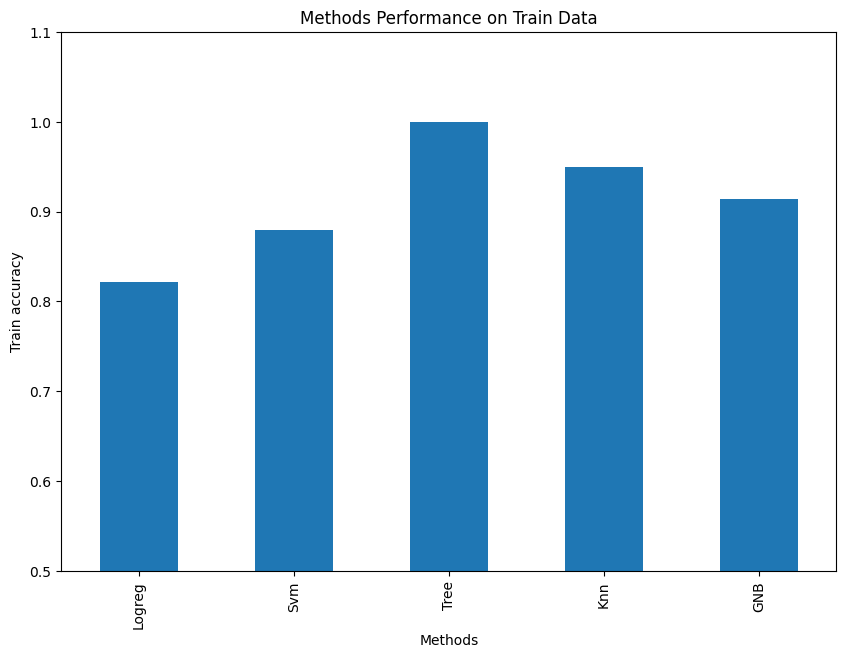

In [147]:
acc_train_methods = data_acc["Accuracy Train"]

ax = acc_train_methods.plot(kind='bar', figsize=(10, 7))
ax.set_xlabel("Methods")
ax.set_ylabel("Train accuracy")
ax.set_title("Methods Performance on Train Data")

#If you want to zoom in to see the results better
ax.set_ylim(ymin=0.5, ymax=1.1)

(0.45, 1.0)

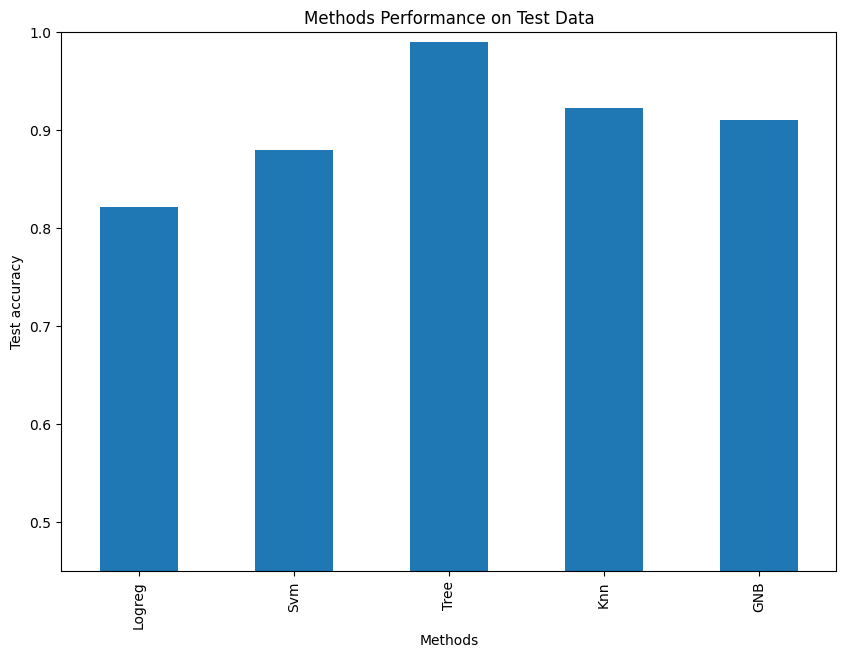

In [148]:
acc_train_methods = data_acc["Accuracy Test"]

ax = acc_train_methods.plot(kind='bar', figsize=(10, 7))
ax.set_xlabel("Methods")
ax.set_ylabel("Test accuracy")
ax.set_title("Methods Performance on Test Data")

#If you want to zoom in to see the results better
ax.set_ylim(ymin=0.45, ymax=1.0)

In [149]:
df.corr()

<ipython-input-149-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,gender,amount,fraud,oldbalanceOrg,oldbalanceDest,newbalanceOrg,newbalanceDest
age,1.000000,0.037185,-0.001531,-0.000292,0.026422,-0.026969,0.026422,-0.026970
gender,0.037185,1.000000,-0.039028,-0.058864,-0.006447,0.013748,-0.006443,0.013744
amount,-0.001531,-0.039028,1.000000,0.467451,0.003490,-0.011019,0.003393,-0.010899
fraud,-0.000292,-0.058864,0.467451,1.000000,0.011944,-0.002724,0.011899,-0.002667
oldbalanceOrg,0.026422,-0.006447,0.003490,0.011944,1.000000,-0.000533,1.000000,-0.000532
oldbalanceDest,-0.026969,0.013748,-0.011019,-0.002724,-0.000533,1.000000,-0.000532,1.000000
newbalanceOrg,0.026422,-0.006443,0.003393,0.011899,1.000000,-0.000532,1.000000,-0.000531
newbalanceDest,-0.026970,0.013744,-0.010899,-0.002667,-0.000532,1.000000,-0.000531,1.000000
